In [1]:
import sys
import os
import pandas as pd
import numpy as np

personal_path = os.getcwd()
personal_path= personal_path[:(personal_path.find("EMSF_CAPSTONE")+ len("EMSF_CAPSTONE/"))].replace("\\", "/")

In [8]:
os.chdir('..')
os.chdir('..')
os.chdir('model_validation/2023_validation')

In [9]:
draft_df=pd.read_csv(personal_path+'/draft_pick_prob/model_validation/2023_validation/2023_draft_order.csv')
possible_players=pd.read_csv(personal_path+'draft_pick_prob/model_validation/2023_validation/2023_PLAYER_IDS.csv')

In [10]:
draft_df=pd.read_csv(personal_path+'/draft_pick_prob/model_validation/2023_validation/2023_draft_order.csv')
file_list =['2023_2AS_md.csv',"2023_2CP_md.csv","2023_2SW_md.csv","2023_3CP_md.csv",'2023_3SW_md.csv','2023_4CP_md.csv','2023_5CP_md.csv','2023_6CP_md.csv',"2023_7CP_md.csv",'2023_AS_md.csv','2023_BM_md.csv','2023_CP_md.csv','2023_DH_bb.csv',"2023_EP_bb.csv",'2023_FC_bb.csv','2023_MH_bb.csv','2023_MP_bb.csv','2023_PW_md.csv','2023_RS_bb.csv','2023_SS_bb.csv','2023_SW_md.csv']

mock_draft_dfs = []

for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    if filename[-6:-4]== 'bb':
        df = df.rename(columns={'RANK': f'bb_RANK_{prefix}_22'})
    else:
        df = df.rename(columns={'RANK': f'md_RANK_{prefix}_22'})
    
    mock_draft_dfs.append(df)  

    
print(mock_draft_dfs[16])



# possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')


              PLAYER_NAME  PLAYER_ID  bb_RANK_MP_22
0           Connor Bedard          1              1
1           Adam Fantilli          2              2
2          Matvei Michkov          8              3
3            Leo Carlsson          3              4
4          Zachary Benson         14              5
5              Will Smith          4              6
6         Dalibor Dvorsky          6              7
7            Ryan Leonard          7              8
8           Brayden Yager         19              9
9            Oliver Moore         18             10
10        Dmitri Simashev         13             11
11         Nate Danielson         11             12
12            Eduard Sale         28             13
13           Colby Barlow         16             14
14       Mikhail Gulyayev         34             15
15             Daniil But         17             16
16          Gabe Perrault          9             17
17           Matthew Wood         12             18
18       Dav

In [12]:
import math
df_player_rankings=possible_players[['PLAYER_ID']]

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[0][['PLAYER_ID','md_RANK_2A_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[1][['PLAYER_ID','md_RANK_2C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[2][['PLAYER_ID','md_RANK_2S_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','md_RANK_3C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','md_RANK_3S_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','md_RANK_4C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','md_RANK_5C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','md_RANK_6C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[8][['PLAYER_ID','md_RANK_7C_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[9][['PLAYER_ID','md_RANK_AS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[10][['PLAYER_ID','md_RANK_BM_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[11][['PLAYER_ID','md_RANK_CP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[12][['PLAYER_ID','bb_RANK_DH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[13][['PLAYER_ID','bb_RANK_EP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[14][['PLAYER_ID','bb_RANK_FC_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[15][['PLAYER_ID','bb_RANK_MH_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[16][['PLAYER_ID','bb_RANK_MP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[17][['PLAYER_ID','md_RANK_PW_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[18][['PLAYER_ID','bb_RANK_RS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[19][['PLAYER_ID','bb_RANK_SS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[20][['PLAYER_ID','md_RANK_SW_22']], how='left', on=['PLAYER_ID'])

df_player_rankings

,PLAYER_ID,md_RANK_2A_22,md_RANK_2C_22,md_RANK_2S_22,md_RANK_3C_22,md_RANK_3S_22,md_RANK_4C_22,md_RANK_5C_22,md_RANK_6C_22,md_RANK_7C_22,...,md_RANK_CP_22,bb_RANK_DH_22,bb_RANK_EP_22,bb_RANK_FC_22,bb_RANK_MH_22,bb_RANK_MP_22,md_RANK_PW_22,bb_RANK_RS_22,bb_RANK_SS_22,md_RANK_SW_22
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,3.0,3.0,4.0,3.0,4.0,2.0,5.0,4.0,4.0,...,3.0,4.0,3.0,4.0,3.0,4.0,4.0,6.0,4.0,4.0
3,4,4.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,...,4.0,5.0,7.0,5.0,4.0,6.0,3.0,4.0,6.0,3.0
4,5,6.0,5.0,12.0,5.0,6.0,5.0,6.0,5.0,6.0,...,5.0,16.0,9.0,10.0,16.0,19.0,6.0,11.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def likelihood(strengths, rankings):
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll = 1  # Initialize as 0 for correct accumulation
    columns_to_go_through = df.columns[1:]
    for i in columns_to_go_through:
        max_rank = df[i].max() + 1
        player_rank = list(df[i])
        fixed_player_rank = [max_rank if math.isnan(x) else x for x in player_rank]
        
        # Determine the weighting factor based on column name
        if i.startswith('bb'):
            weight = 0.5  # Example: 0.5 for less value
        elif i.startswith('md'):
            weight = 1.0  # Example: 1.0 (or more) for 'md' columns
        else:
            weight = 1.0  # Default weight for other columns

        # Apply the weighting factor
        neg_ll -= weight * likelihood(params, fixed_player_rank)

    return neg_ll

In [14]:
def constraint_eq(x):
    return sum(x)

In [24]:
import scipy.optimize

counter=20
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-30,30))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 30.          25.29438892  22.49835789  22.17952627  19.33052079
  19.46093288  19.32563925  20.62078149  17.98322932  16.72712223
  17.92957788  17.55849924  16.67193958  18.41466642  16.74319495
  17.1423856   15.95205811  17.596422    16.93557975  17.35437275
  14.25365432  14.72767464  15.97428377  15.58628619  13.61871746
  13.4126465   14.44856794  15.8026637   14.36671749  14.69431717
  14.28209873  13.25772036  12.68503947  14.54407315  14.67356846
  14.00130179  13.18407038  12.47727484  13.02867541  11.81006273
  12.04691491  13.33911108  11.65393067  12.80349519  13.21416196
  13.58383402  11.67646511  11.74033447  13.14353702  11.91584437
  11.15667565  11.54187581  11.34521776  11.17046614  10.93735476
  11.41913415  10.50181489  11.58677093  12.09729301   8.10042701
   9.90463153  11.55667752  10.72130198  10.06342763   9.17913874
  11.92030581  10.73343957  10.43758592  10.22152675   9.07688099
   9.70381987  10.41558892   8.82504608  10.70922233  10.81862571
   9.64089

In [25]:
player_ability_parameters_df=pd.read_csv(personal_path+'PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS
0,Connor Bedard,1,30.000000
1,Adam Fantilli,2,25.294389
2,Leo Carlsson,3,22.498358
3,William Smith,4,22.179526
7,Matvei Michkov,8,20.620781
...,...,...,...
240,Matthew Andonovski,241,-24.915937
239,Jack Phelan,240,-24.921136
236,Marcel Marcel,237,-24.922870
238,Melker Thelin,239,-24.923982


In [27]:
os.chdir('..')
os.chdir('..')
os.chdir('player_ability_params')
# os.chdir('model_validation/2023_validation')

In [28]:
player_ability_parameters_df.to_csv('player_parameters.csv', index=False)

In [29]:
x = 224  # Number of players to select
num_simulations = 10000  # Number of simulations

def simulate_player_selection(parameters, x):
    selected_players = []
    remaining_parameters = parameters.copy()
    indices=[i for i in range(len(parameters))]
    for _ in range(x):
        # Calculate choice probabilities based on the exponents of parameters
        choice_probabilities = [np.exp(param) for param in remaining_parameters]
        # Normalize choice probabilities
        total_probability = sum(choice_probabilities)
        normalized_probabilities = [prob / total_probability for prob in choice_probabilities]
        # Select a player based on the probabilities
        selected_player = np.random.choice(range(len(remaining_parameters)), p=normalized_probabilities)
        # Add the selected player to the list and remove the corresponding parameter
        selected_players.append(indices[selected_player]+1)
        indices.pop(selected_player)
        remaining_parameters = np.delete(remaining_parameters, selected_player)
        # print(len(remaining_parameters))

    return selected_players

simulation_results = []

for _ in range(num_simulations):
    selected_players = simulate_player_selection(player_ability_parameters_df['ABILITY_PARAMS'], x)
    simulation_results.append(selected_players)

In [30]:
lists_of_numbers=[]

for j in range(len(result.x)):
    first_player=[]
    for i in simulation_results:
        test_array = np.array(i)
        if (j+1) in i:
            res_array = np.where(test_array == j+1)[0][0]+1
            first_player.append(float(res_array))
        else:
            first_player.append(250)
    lists_of_numbers.append(first_player)

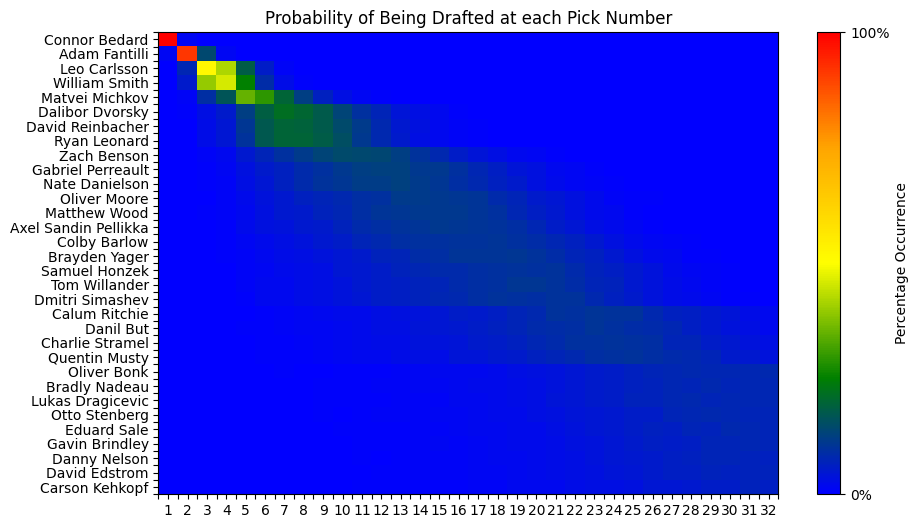

In [34]:
import numpy as np
import matplotlib.pyplot as plt

lists_of_numbers_2=lists_of_numbers[0:32]
unique_numbers_per_list = [np.unique(sublist, return_counts=True) for sublist in lists_of_numbers_2]
percentage_occurrences_per_list = []
for unique_numbers, counts in unique_numbers_per_list:
    total_count = sum(counts)
    percentages = [count / total_count for count in counts]
    percentage_occurrences_per_list.append(percentages)

# percentage_occurrences_per_list
# unique_numbers_per_list
from matplotlib.ticker import MultipleLocator
heatmap_array=np.zeros((32,32))

for i in range(len(unique_numbers_per_list)):
    for j in range(len(unique_numbers_per_list[i][0])):
        if (int(unique_numbers_per_list[i][0][j]))<=32:
            heatmap_array[i][int(unique_numbers_per_list[i][0][j])-1]=percentage_occurrences_per_list[i][int(j)]
            
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# colors = [(0.8, 0, 0), (1, 0, 0), (1, 0.4, 0), (1, 0.8, 0), (1, 1, 0), (0.8, 0.8, 1), (0, 0, 1)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
log_transformed_data = np.log1p(heatmap_array)
heatmap_array
player_names=list(player_ability_parameters_df['PLAYER_NAME'].head(32))
plt.figure(figsize=(10, 6))
num_bins = 100  # Adjust the number of color levels

cax = plt.imshow(log_transformed_data, cmap=custom_cmap, interpolation='nearest', aspect='auto')
cbar = plt.colorbar(cax, ticks=[log_transformed_data.min(), log_transformed_data.max()])
cbar.set_ticklabels(['0%', '100%'])
cbar.set_label('Percentage Occurrence')
# plt.grid(which='both', color='black', linewidth=0.5)


plt.xticks(np.arange(32), range(1, 33))
plt.yticks(np.arange(len(player_names)), player_names)
plt.title('Probability of Being Drafted at each Pick Number')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.show()

In [43]:
os.getcwd()
os.chdir('modelling/scripts')

In [46]:
import extract_probabilities

extract_probabilities.get_pick_probability_by_next_pick(
    [1,2], 10000, 5
)

,PLAYER_ID,PICK_5
2,3,0.1859
3,4,0.2659
4,8,0.8237
5,6,0.9392
6,5,0.9500
...,...,...
273,241,1.0000
274,240,1.0000
275,237,1.0000
276,239,1.0000
